## Monte Carlo Simulation of IRIS scores for standard scenarios

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def do_plot(xlabels, ylabels, expectation):
    # Reference - based on https://goo.gl/egTpSx
    fig, ax = plt.subplots()
    im = ax.imshow(expectation)

    ax.set_xticks(np.arange(len(xlabels)))
    ax.set_yticks(np.arange(len(ylabels)))

    ax.set_xticklabels(xlabels)
    ax.set_yticklabels(ylabels)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    for i in range(len(ylabels)):
        for j in range(len(xlabels)):
            text = ax.text(j, i, expectation[i, j],
                           ha="center", va="center", color="w")

    ax.set_title("Expectation for self-bet VS real-value")
    fig.tight_layout()

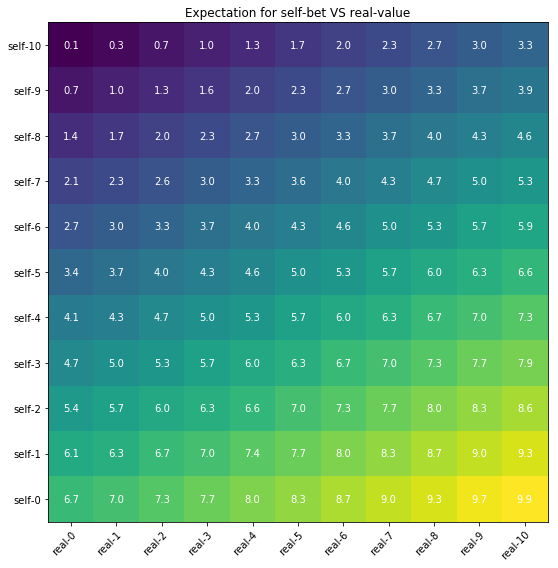

In [6]:
STDEV = 4
IRISmax = 10
IRISmin = 0
EXPECTED_VOTES = 100
MC_TRIALS = 100

v1 = np.ones(EXPECTED_VOTES)


def normalize(x):
    return np.maximum(np.minimum(x, IRISmax*v1), IRISmin*v1)


def sim_IRIS(self_score, real_value):
    user_y_appreciation_for_data_of_user_y = self_score
    other_users_appreciation_for_data_of_user_y = normalize(np.random.normal(real_value,
                                                                             STDEV,
                                                                             EXPECTED_VOTES))
    x = user_y_appreciation_for_data_of_user_y
    y = np.median(other_users_appreciation_for_data_of_user_y)
    return float((-2 * x) + y + (2 * IRISmax)) / 3.


def IRIS_expectation(self_score, real_value):
    total = sum(sim_IRIS(self_score, real_value)
                for i in range(MC_TRIALS))
    return float(total) / MC_TRIALS


self_score_range = range(IRISmax, IRISmin - 1, -1)
real_value_range = range(IRISmin, IRISmax + 1)

expectations = np.array([[round(IRIS_expectation(self_score, real_value), 1)
                          for real_value in real_value_range]
                         for self_score in self_score_range])

xlabels = ["real-{}".format(i) for i in real_value_range]
ylabels = ["self-{}".format(i) for i in self_score_range]


plt.rcParams['figure.figsize'] = [8, 8]


do_plot(xlabels, ylabels, expectations)